# importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Load Data

In [2]:
# برای آپلود فایل در Colab
from google.colab import files
import pandas as pd

uploaded = files.upload()  # پنجره انتخاب فایل باز می‌شود

# نمایش فایل‌های آپلود شده
for fn in uploaded.keys():
    print(f"Uploaded file: {fn}")

# فرض بر اینه که تنها یک فایل انتخاب می‌کنیم
file_name = list(uploaded.keys())[0]

# خواندن دیتافریم
df = pd.read_csv(file_name)
print("Data loaded successfully!")
df.head()


Saving merged_monthly_prepared.csv to merged_monthly_prepared.csv
Uploaded file: merged_monthly_prepared.csv
Data loaded successfully!


,Date,Wheat_Amount,Urea_Price,Gas_Price,YearMonth
0,2019-07-01,544.656545,249.63000,2.37,2019-07
1,2019-08-01,544.656545,253.10000,2.22,2019-08
2,2019-09-01,544.656545,251.00000,2.56,2019-09
3,2019-10-01,544.656545,235.74918,2.33,2019-10
4,2019-11-01,544.656545,219.99000,2.65,2019-11


# Quick Analysis

In [3]:
# اطلاعات کلی
print(df.info())
print(df.describe())

# بررسی missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          74 non-null     object 
 1   Wheat_Amount  74 non-null     float64
 2   Urea_Price    74 non-null     float64
 3   Gas_Price     74 non-null     float64
 4   YearMonth     74 non-null     object 
dtypes: float64(3), object(2)
memory usage: 3.0+ KB
None
       Wheat_Amount  Urea_Price  Gas_Price
count     74.000000   74.000000  74.000000
mean     470.880950  382.179486   3.345000
std       37.135095  145.031995   1.710605
min      430.216161  193.630000   1.490000
25%      445.609754  300.297500   2.205000
50%      450.942330  352.142083   2.645000
75%      494.025216  427.070000   4.107500
max      544.656545  794.600000   8.810000
Date            0
Wheat_Amount    0
Urea_Price      0
Gas_Price       0
YearMonth       0
dtype: int64


In [4]:
if 'Date' in df.columns:
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df['Month'] = pd.to_datetime(df['Date']).dt.month
    df = df.drop(columns=['Date'])

# اگر ستون YearMonth داریم
if 'YearMonth' in df.columns:
    df['YM_Year'] = df['YearMonth'].str.split('-').str[0].astype(int)
    df['YM_Month'] = df['YearMonth'].str.split('-').str[1].astype(int)
    df = df.drop(columns=['YearMonth'])

# Feature & Target Selection

In [5]:
# مثلا فرض کنیم میخوایم قیمت اوره رو پیش‌بینی کنیم
X = df.drop(columns=['Urea_Price'])  # ستون‌های ویژگی
y = df['Urea_Price']                 # ستون هدف


# Train and Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling (Linear Regression first)

In [7]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R2:", r2_lr)

Linear Regression RMSE: 84.6307861297795
Linear Regression R2: 0.7437969562954548


# Modeling (GradientBoostingRegressor) *with best params*

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ساخت مدل | بهترین پارامتر های ممکن استفاده شده
model = GradientBoostingRegressor(
    n_estimators=100,      # تعداد بیشتر درخت‌ها
    max_depth=5,           # کمی عمیق‌تر از پیش‌فرض
    learning_rate=0.1,    # نرخ یادگیری پایین‌تر
    subsample=1.0,         # نمونه‌برداری جزئی برای کاهش Overfitting
    min_samples_leaf=4,
    min_samples_split= 2,
    random_state=42
)


# آموزش مدل
model.fit(X_train, y_train)

# پیش‌بینی
y_pred = model.predict(X_test)

# ارزیابی
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting RMSE:", rmse)
print("Gradient Boosting R2:", r2)


Gradient Boosting RMSE: 59.14915419461106
Gradient Boosting R2: 0.87485179859666


# Visualization

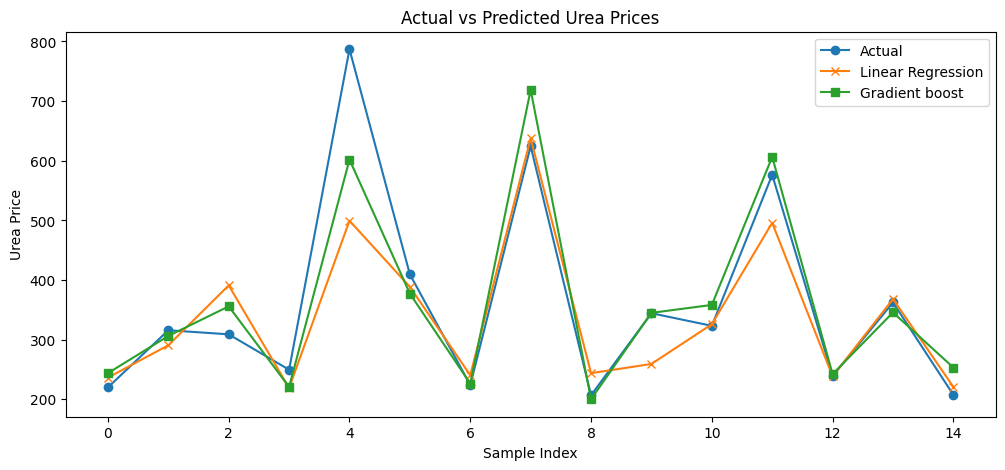

In [10]:
plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)), y_test.values, label='Actual', marker='o')
plt.plot(range(len(y_test)), y_pred_lr, label='Linear Regression', marker='x')
plt.plot(range(len(y_test)), y_pred, label='Gradient boost', marker='s')

plt.title("Actual vs Predicted Urea Prices")
plt.xlabel("Sample Index")
plt.ylabel("Urea Price")
plt.legend()
plt.show()
